In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import robust_scale
warnings.filterwarnings("ignore")

In [ ]:
data_path = '/content/CC GENERAL.csv'
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


# Exploratory Data Analysis

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.drop(columns= 'CUST_ID', inplace= True)

In [ ]:
df.shape

(8950, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## Handling missing values

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

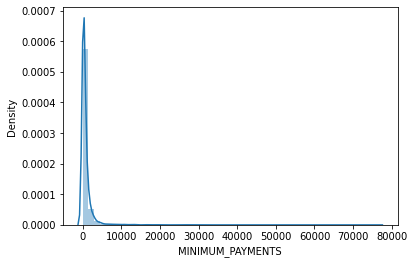

In [ ]:
sns.distplot(df['MINIMUM_PAYMENTS'])

It seems that the values are missing at random and we can simply use median to replace the Nan values as the distribution for minimum payments is skewed

In [ ]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace = True)

In [ ]:
df.dropna(subset= ['CREDIT_LIMIT'], inplace = True)

## Visualization

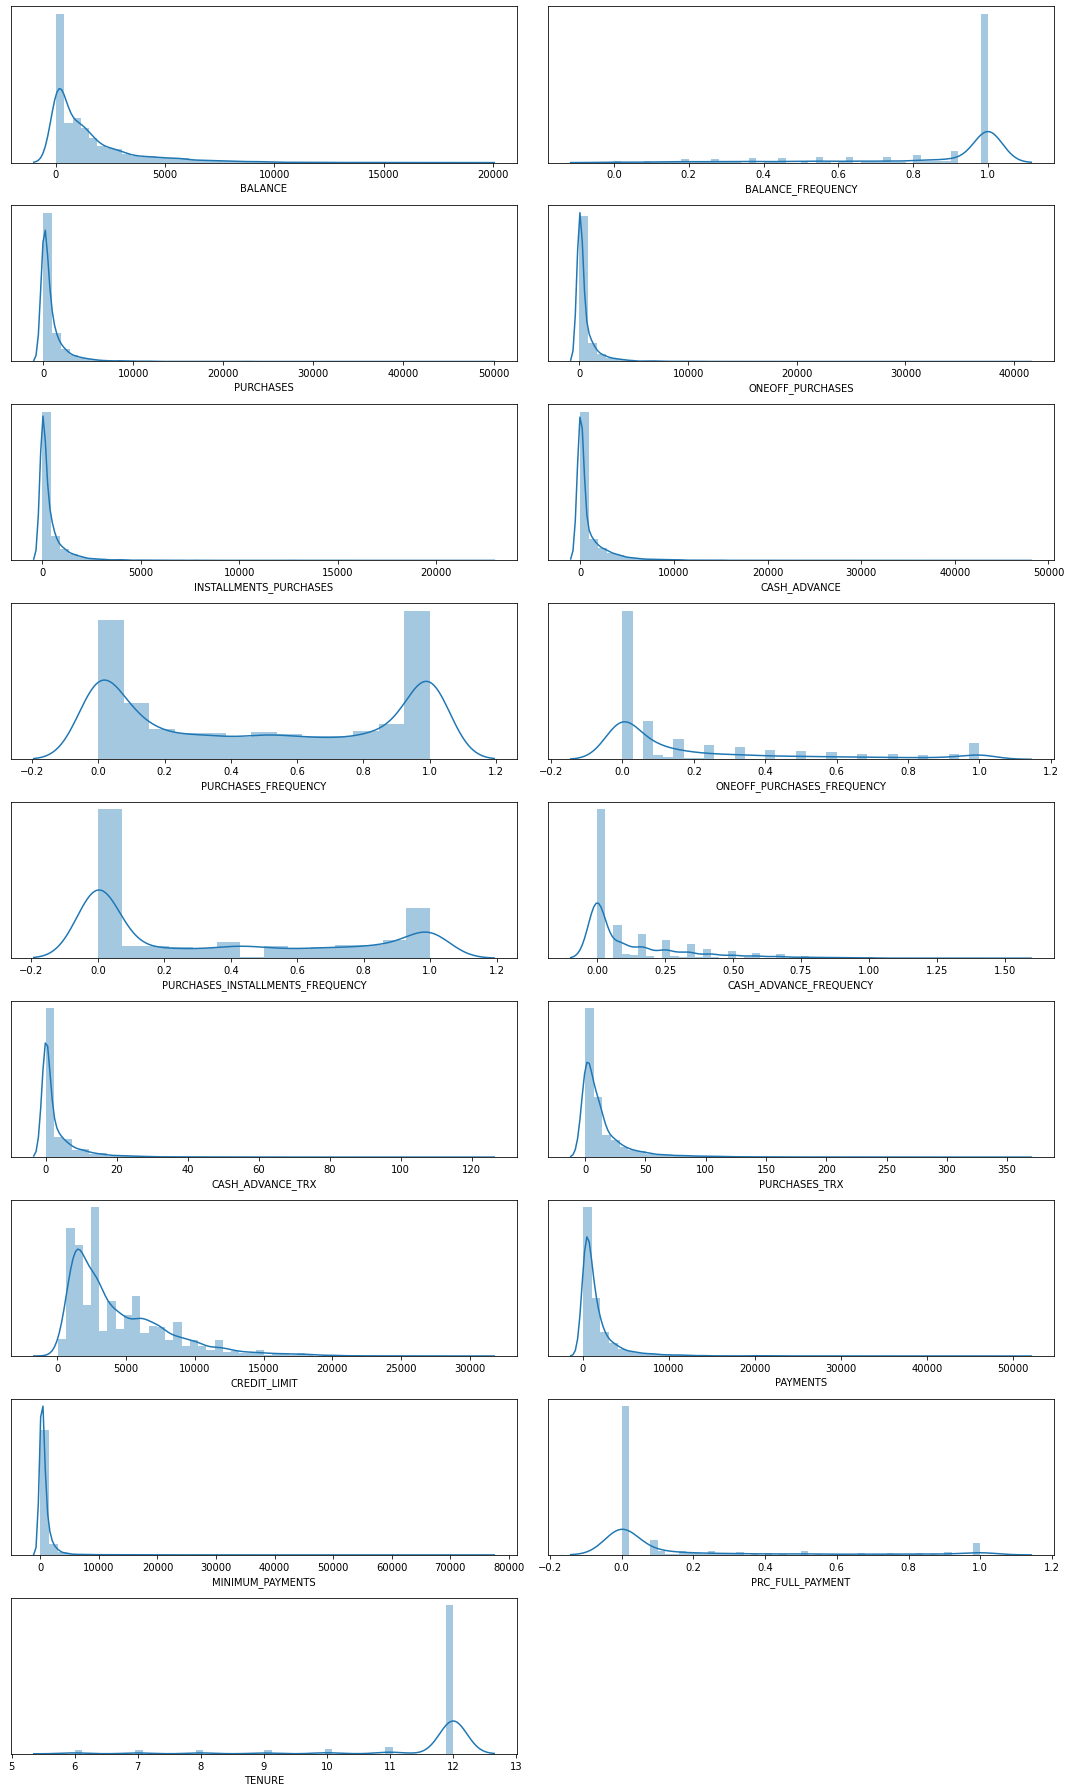

In [ ]:
columns = df.columns
plt.figure(figsize= (15,25))
for i in range (len(columns)):
  plt.subplot(9,2,i+1)
  plt.yticks([])
  sns.distplot(df[columns[i]])
plt.tight_layout()

In [ ]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
          'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

In [ ]:
for col in cols:
  df[col] = np.log(1 + df[col])

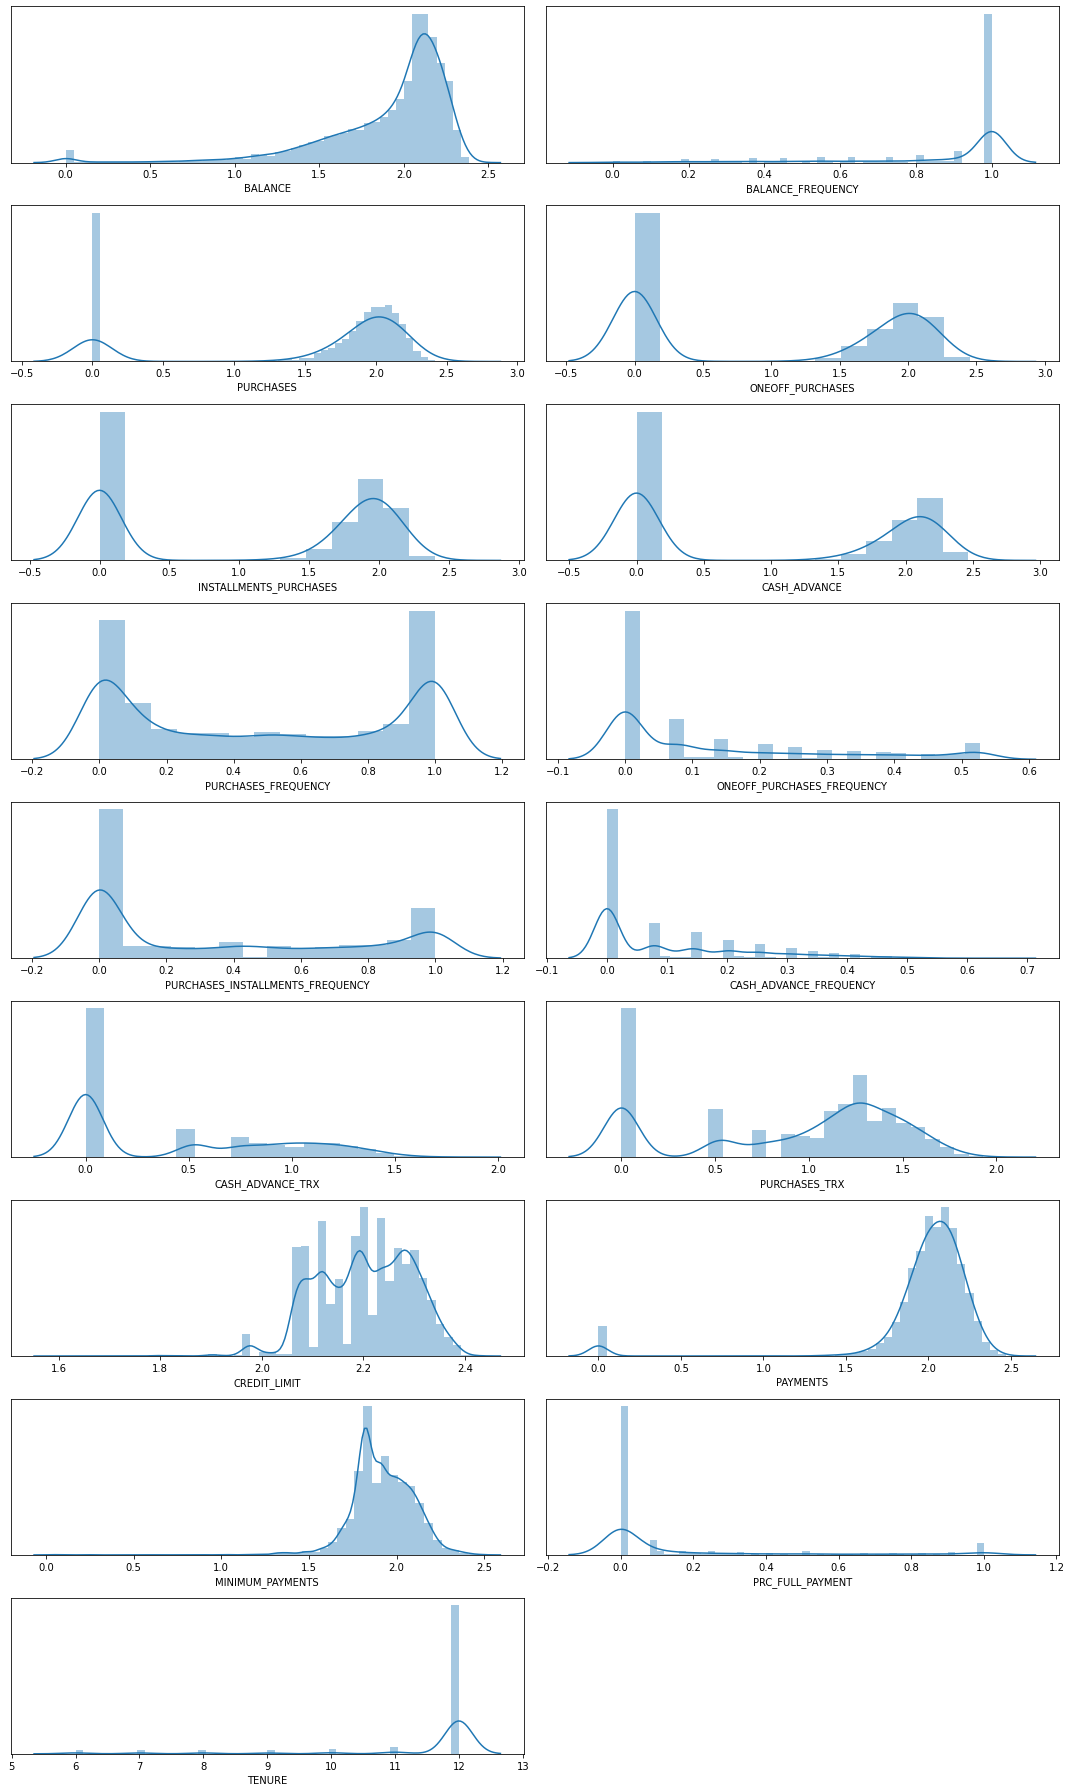

In [ ]:
columns = df.columns
plt.figure(figsize= (15,25))
for i in range (len(columns)):
  plt.subplot(9,2,i+1)
  plt.yticks([])
  sns.distplot(df[columns[i]])
plt.tight_layout()

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1.910842,0.877350,1.524671,1.011198,1.082969,0.988040,0.490405,0.131850,0.364478,0.098625,0.457731,0.918957,2.203578,1.988491,1.918830,0.153732,11.517935
std,0.384964,0.236798,0.848398,0.986702,0.964321,1.031238,0.401360,0.170607,0.397451,0.129914,0.515624,0.575058,0.091317,0.364779,0.178880,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.595709,0.000000,0.018804,0.000000,6.000000
25%,1.768601,0.888889,1.549408,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.526589,2.125655,1.938940,1.815927,0.000000,12.000000
50%,2.050767,1.000000,1.930506,1.539779,1.704713,0.000000,0.500000,0.077000,0.166667,0.000000,0.000000,1.124748,2.197969,2.048296,1.909143,0.000000,12.000000
75%,2.155037,1.000000,2.081086,1.996197,1.967390,2.081501,0.916667,0.232986,0.750000,0.182880,0.959135,1.358505,2.280310,2.146026,2.037536,0.142857,12.000000
max,2.384581,1.000000,2.468134,2.452341,2.399831,2.464775,1.000000,0.526589,1.000000,0.650391,1.761349,1.929101,2.425598,2.470987,2.505022,1.000000,12.000000


In [ ]:
pca = PCA(n_components= 2)
pca_data = pca.fit_transform(df)

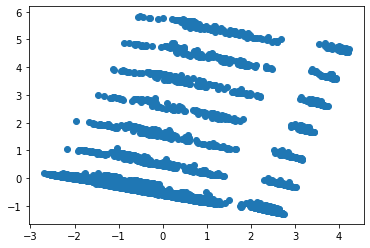

In [ ]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])

In [ ]:
pca = PCA(n_components= 3)
pca_data = pca.fit_transform(df)

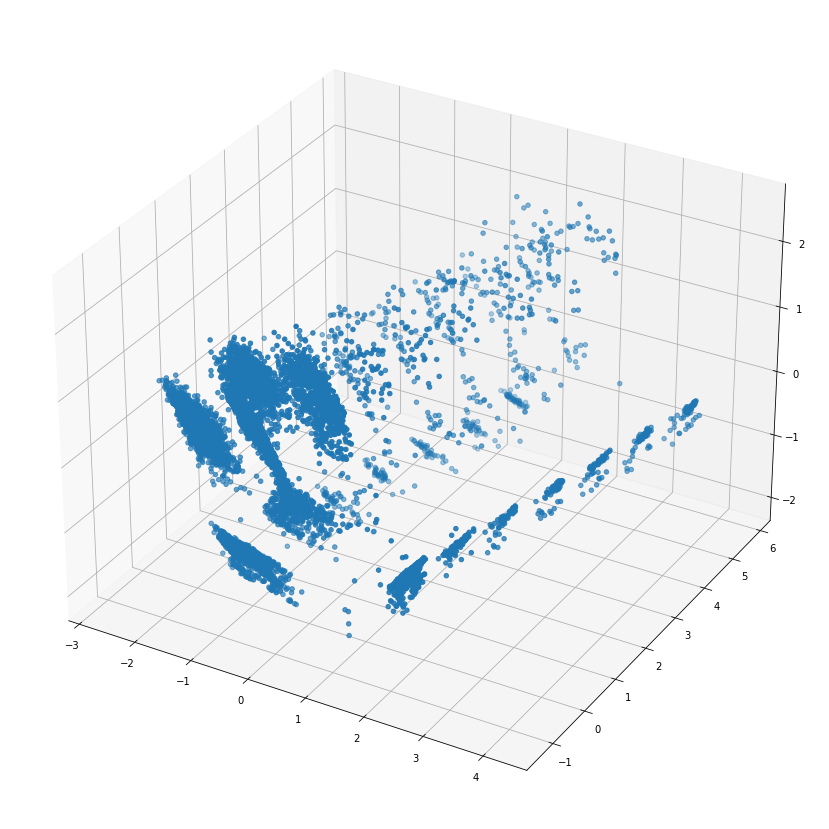

In [ ]:
plt.figure(figsize= (15, 15))
ax = plt.axes(projection ='3d')
x = pca_data[:, 0]
y = pca_data[:, 1]
z = pca_data[:, 2]
ax.scatter3D(x, y , z)

## Model Training

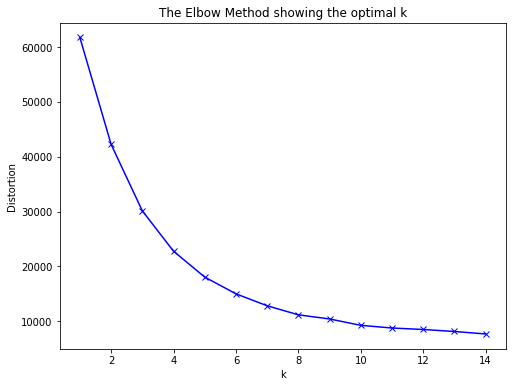

In [ ]:
distortions = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 10)
labels = kmeans.fit_predict(df)
silhouette_score(df, labels)

0.5230818593778775

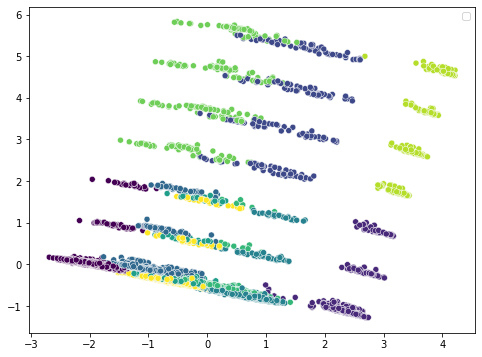

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(pca_data[:,0], pca_data[:,1], c = labels )
plt.legend()
plt.show()

In [ ]:
dbscan = DBSCAN(eps = 0.7, min_samples= 7)
labels = dbscan.fit_predict(df)
silhouette_score(df, labels)

0.3040264744412396

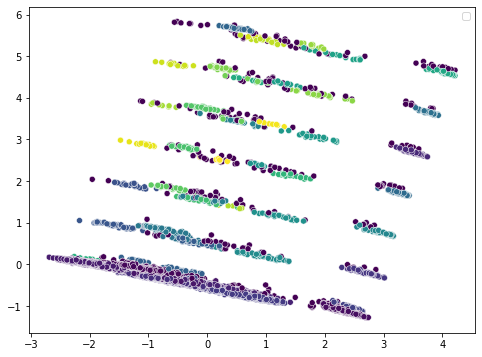

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(pca_data[:,0], pca_data[:,1], c = labels )
plt.legend()
plt.show()

In [ ]:
Gss = GaussianMixture(10)

In [ ]:
labels = Gss.fit_predict(df)

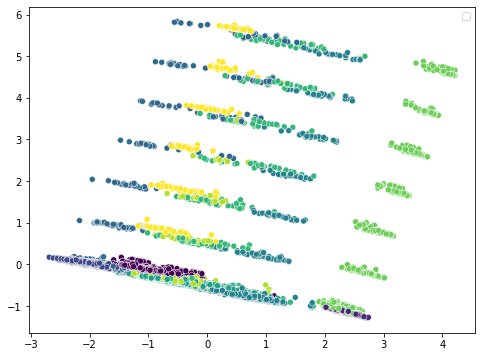

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(pca_data[:,0], pca_data[:,1], c = labels )
plt.legend()
plt.show()

In [ ]:
silhouette_score(df, labels)

0.3885372673534803

In [ ]:
single = AgglomerativeClustering(n_clusters= 14)

In [ ]:
single = AgglomerativeClustering(n_clusters= 14)
labels = single.fit_predict(df)
silhouette_score(df, labels)

0.5235588084238666

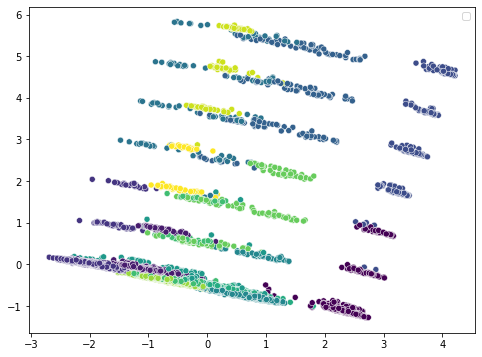

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(pca_data[:,0], pca_data[:,1], c = labels )
plt.legend()
plt.show()

## Applying pca

In [ ]:
scaler = StandardScaler()

In [ ]:
std_data = scaler.fit_transform(df)

In [ ]:
cov = np.cov(std_data.T)

In [ ]:
val, vec = np.linalg.eig(cov)

In [ ]:
sum_eig_val = np.sum(val)
explained_variance = val/ sum_eig_val
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.34306708 0.54254342 0.63856867 0.7110438  0.77573617 0.83280841
 0.87583677 0.91121527 0.9379904  0.95660639 0.96907994 0.9786442
 0.98673016 0.99533746 0.99725492 0.99866353 1.        ]


In [ ]:
pca = PCA(n_components=0.95)
df_red = pca.fit_transform(df)

In [ ]:
df_red.shape

(8949, 6)

In [ ]:
single = AgglomerativeClustering(n_clusters= 14)
labels = single.fit_predict(df)
silhouette_score(df, labels)

0.5235588084238666

In [ ]:
data = df.copy()
data['labels'] = labels
data['labels'].value_counts()

0     1799
2     1677
1     1542
9      953
11     877
6      654
8      380
3      253
4      184
10     144
5      142
7      141
12     122
13      81
Name: labels, dtype: int64

In [ ]:
single = AgglomerativeClustering(n_clusters= 14)
labels = single.fit_predict(df)
silhouette_score(df, labels)

single = AgglomerativeClustering(n_clusters= 14)
labels = single.fit_predict(df)
silhouette_score(df, labels)

single = AgglomerativeClustering(n_clusters= 14)
labels = single.fit_predict(df)
silhouette_score(df, labels)